<a href="https://colab.research.google.com/github/jasonnzhangg2/job-market-analysis-data-analytics-project/blob/main/4_Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How well do jobs and skills pay for Data Analysts

Evaluate median salary for top 6 data jobs


In [10]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter data to only inclulde the salary values from Canada

In [11]:
df_CAN = df[df['job_country'] == 'Canada'].dropna(subset=['salary_year_avg'])

Get the top 6 job titles

In [12]:
df_CAN['job_title_short'].value_counts()

job_list = df_CAN['job_title_short'].value_counts().index[:6].to_list()

# Filter df
df_top6 = df_CAN[df_CAN['job_title_short'].isin(job_list)]

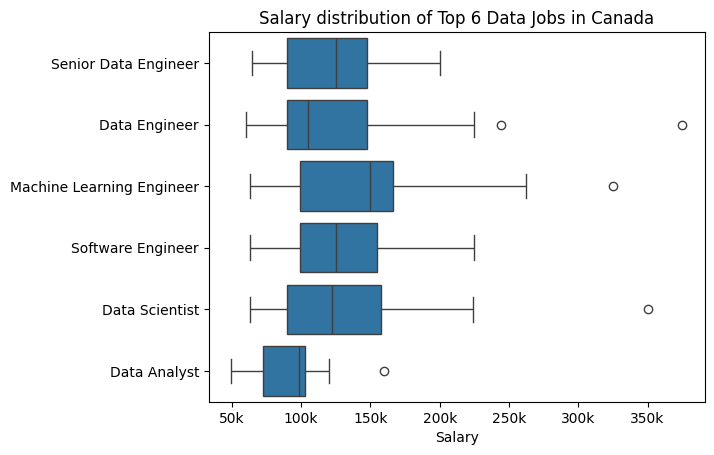

In [19]:
sns.boxplot(data=df_top6, x = 'salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

plt.title('Salary distribution of Top 6 Data Jobs in Canada')
plt.xlabel('Salary')
plt.ylabel('')

tickx_x = plt.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')
plt.gca().xaxis.set_major_formatter(tickx_x)
plt.show()

Get the median for the top 6 jobs

In [28]:
job_median = df_top6.groupby('job_title_short')['salary_year_avg'].median()

job_median.sort_values(ascending=False, inplace=True)

job_median


,salary_year_avg
job_title_short,
Machine Learning Engineer,149653.0
Senior Data Engineer,125000.0
Software Engineer,125000.0
Data Scientist,122500.0
Data Engineer,105000.0
Data Analyst,98500.0


Order the plot by median salary

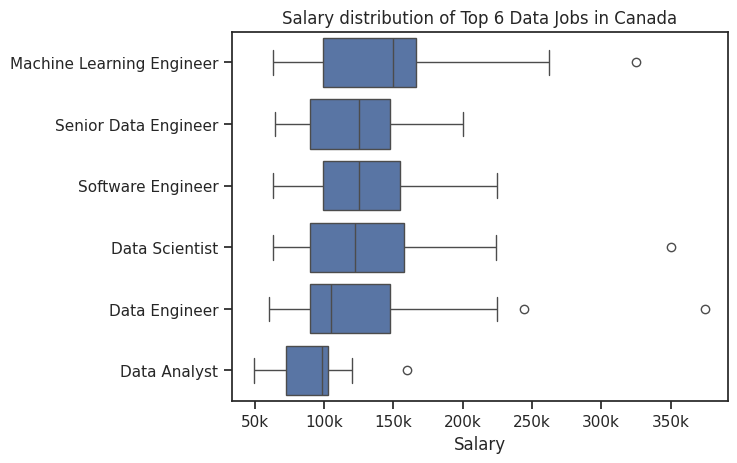

In [30]:
job_order = job_median.sort_values(ascending=False).index
sns.boxplot(data=df_top6, x = 'salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary distribution of Top 6 Data Jobs in Canada')
plt.xlabel('Salary')
plt.ylabel('')

tickx_x = plt.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')
plt.gca().xaxis.set_major_formatter(tickx_x)
plt.show()